# **Paris: Urban Cooling Strategy**

**Challenge:** 2003 heatwave killed 15,000 in France; urban heat islands

**Adaptations:**
* Cool roofs and green roofs (mandatory for new buildings)
* Urban forests and parks expansion
* "Cool islands" (misting stations, water fountains)
* Building codes requiring passive cooling

**Data available:** Temperature data, mortality statistics, vegetation cover changes

## **1. Historical trends showing the environmental challenge**

The goal of this section is to show how Paris has been affected by rising temperatures over time and to quantify the intensity of the urban heat island (UHI) effect.

### **1.1 Long-term evolution of average annual temperature in Paris (1873–2024)**

**Data cleaning and preparation**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [64]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/Shareddrives/Physics_Project/Data/1_Historical_trends_to_quantify_the_problem/temperature_moyenne_paris.csv"

temperature_moyenne_paris = pd.read_csv(file_path, sep=';', encoding='utf-8')
temperature_moyenne_paris.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Année,Température moyenne annuelle,URL Bulletin annuel
0,1988,12.45,NaN
1,1900,11.58,NaN
2,1951,11.37,NaN
3,1916,10.99,NaN
4,1995,12.90,NaN


In [65]:
# sort the dataset by year in ascending order
temperature_moyenne_paris = temperature_moyenne_paris.sort_values(by='Année', ascending=True)

# Verify the new order
print(temperature_moyenne_paris.head(10))

print(temperature_moyenne_paris.tail(10))

     Année  Température moyenne annuelle URL Bulletin annuel
16    1873                         10.69                 NaN
127   1874                         10.94                 NaN
33    1875                         10.85                 NaN
67    1876                         11.20                 NaN
139   1877                         11.05                 NaN
54    1878                         10.70                 NaN
23    1879                          8.74                 NaN
102   1880                         11.05                 NaN
107   1881                         10.19                 NaN
129   1882                         10.91                 NaN
     Année  Température moyenne annuelle  \
83    2015                         13.47   
104   2016                         12.87   
120   2017                         13.39   
85    2018                         13.91   
101   2019                         13.66   
98    2020                         14.28   
86    2021           

In [66]:
# Drop the column that contains only NaN values
temperature_moyenne_paris = temperature_moyenne_paris.drop(columns=['URL Bulletin annuel'])

# Verify the result
temperature_moyenne_paris.head()

,Année,Température moyenne annuelle
16,1873,10.69
127,1874,10.94
33,1875,10.85
67,1876,11.20
139,1877,11.05


**Visualizations**


The following visualizations show how Paris’s average annual temperature has evolved from 1873 to 2024.

The first graph displays the long-term temperature trend with a regression line and the total increase in temperature over the period.  

The second graph compares two sub-periods (1873–1949 and 1950–2024) to highlight how the rate of warming has accelerated in recent decades.


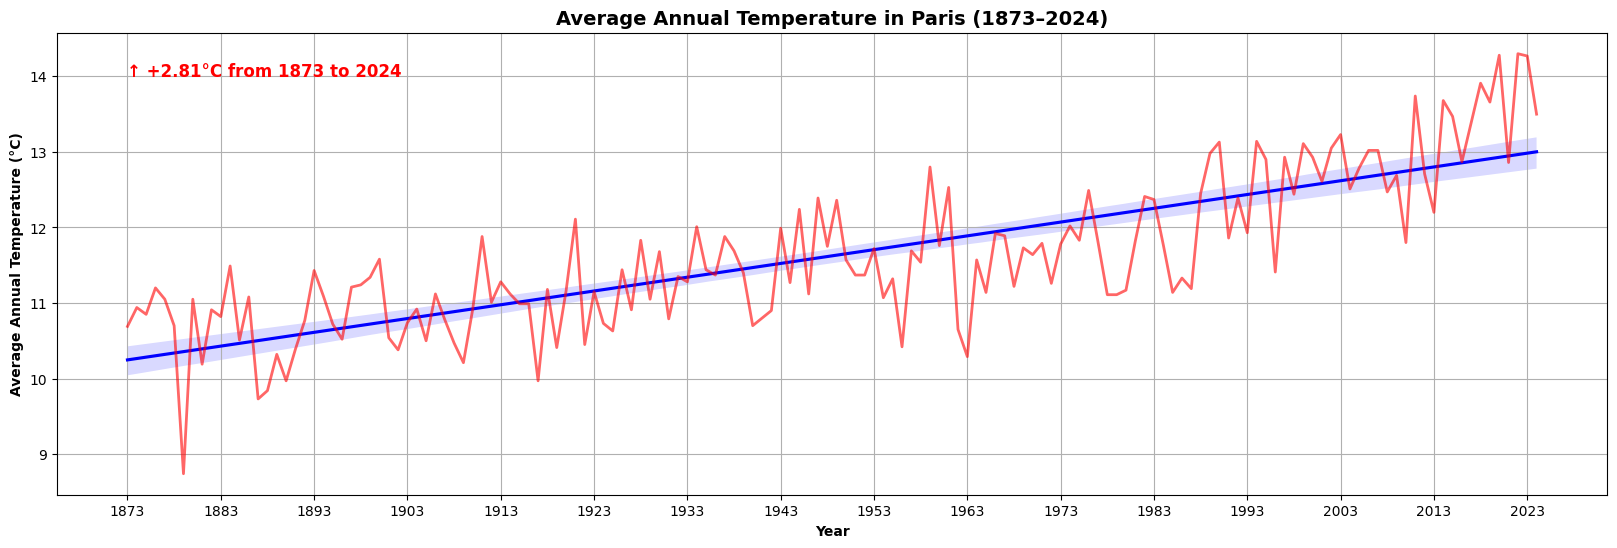

In [67]:
# temperature increase between first and last available years
temp_start = temperature_moyenne_paris['Température moyenne annuelle'].iloc[0]
temp_end = temperature_moyenne_paris['Température moyenne annuelle'].iloc[-1]
year_start = int(temperature_moyenne_paris['Année'].iloc[0])
year_end = int(temperature_moyenne_paris['Année'].iloc[-1])

temp_change = temp_end - temp_start


plt.figure(figsize=(20,6))

sns.regplot(x='Année', y='Température moyenne annuelle', data=temperature_moyenne_paris,
            scatter=False, color='tomato', line_kws={'color':'blue'})

plt.plot(temperature_moyenne_paris['Année'], temperature_moyenne_paris['Température moyenne annuelle'], color='red', linewidth=2, alpha=0.6)

# titles and labels
plt.title('Average Annual Temperature in Paris (1873–2024)', fontsize=14, fontweight='bold')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Annual Temperature (°C)', fontweight='bold')

# set x-axis ticks every 10 years
plt.xticks(np.arange(temperature_moyenne_paris['Année'].min(), temperature_moyenne_paris['Année'].max()+1, 10)) # np.arange is (start,stop,step)

# annotation for the temperature increase
plt.text(1873, 14, # defines where the text will appear
         f"↑ +{temp_change:.2f}°C from {year_start} to {year_end}", # :.2f means format as a number with 2 decimal places
         fontsize=12, color='red', weight='bold')

plt.grid()
plt.show()


This graph shows the evolution of the average annual temperature in Paris between 1873 and 2024, based on official Météo-France data.

Each point represents the mean temperature for a given year, while the blue regression line highlights the long-term trend.  

Although there are short-term variations from year to year, the overall tendency is unmistakable: Paris has warmed significantly over the past 150 years.  

Between 1873 and 2024, the city’s average temperature increased by about **2.8°C**, reflecting a clear and steady rise in heat levels.  
This confirms that Paris is directly affected by global climate change, with warming becoming more pronounced since the second half of the 20th century.


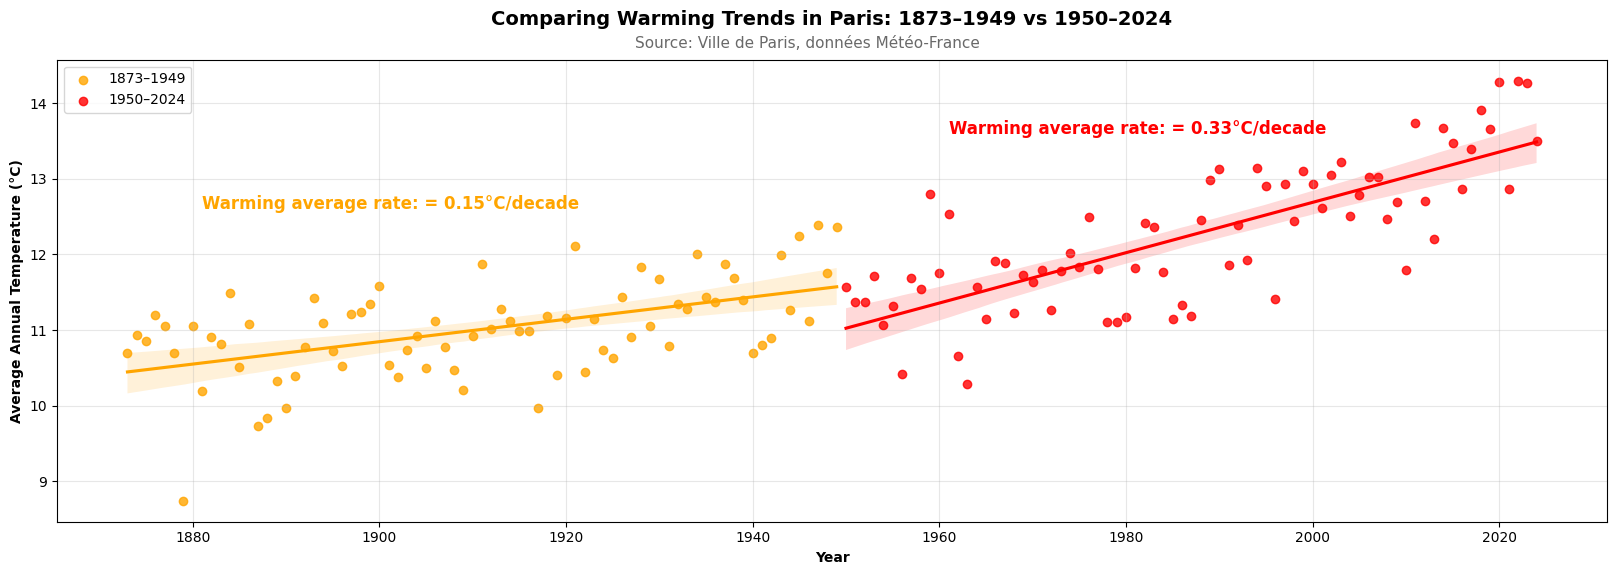

In [68]:
# seperate periods
df_old = temperature_moyenne_paris[temperature_moyenne_paris['Année'] < 1950]
df_recent = temperature_moyenne_paris[temperature_moyenne_paris['Année'] >= 1950]
plt.figure(figsize=(20,6))

# linear regressions
sns.regplot(x='Année', y='Température moyenne annuelle', data=df_old, color='orange', label='1873–1949', line_kws={'color':'orange'})
sns.regplot(x='Année', y='Température moyenne annuelle', data=df_recent, color='red', label='1950–2024', line_kws={'color':'red'})


# compute the warming slope for each period
slope_old, intercept_old, _, _, _ = linregress(df_old['Année'], df_old['Température moyenne annuelle'])
slope_recent, intercept_recent, _, _, _ = linregress(df_recent['Année'], df_recent['Température moyenne annuelle'])

# convert slopes to °C per decade for readability
slope_old_dec = slope_old * 10
slope_recent_dec = slope_recent * 10

plt.title('Comparing Warming Trends in Paris: 1873–1949 vs 1950–2024', fontsize=14, fontweight='bold', pad=25)
plt.suptitle('Source: Ville de Paris, données Météo-France', fontsize=11, y=0.92, color='dimgray')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Annual Temperature (°C)', fontweight='bold')

# add slope annotations directly on the graph
plt.text(1881, 12.6, f"Warming average rate: = {slope_old_dec:.2f}°C/decade", color='orange', fontsize=12, weight='bold')
plt.text(1961, 13.6, f"Warming average rate: = {slope_recent_dec:.2f}°C/decade", color='red', fontsize=12, weight='bold')

plt.legend()
plt.grid(alpha=0.3)
plt.show()


This second graph compares two distinct periods to highlight how the pace of warming in Paris has accelerated over time.

From 1873 to 1949 (in orange), the city's average temperature rose slowly, at about **0.15°C per decade**.  

After 1950 (in red), the warming trend became much steeper, reaching around **0.33°C per decade** which is more than twice as fast.  

This sharp increase after the mid-20th century reflects the growing influence of human activities, urbanization, and greenhouse gas emissions.  

Overall, the contrast between the two slopes clearly shows that climate change in Paris has intensified significantly in recent decades.


### **1.2 Quantifying the Urban Heat Island Effect in Paris**


In [69]:
file_path = "/content/drive/Shareddrives/Physics_Project/Data/1_Historical_trends_to_quantify_the_problem/indicateurs_icu.csv"

indicateurs_icu = pd.read_csv(file_path, sep=',')
indicateurs_icu.head(10)

,fid,code_giris,can_orient,city_irreg,wdt_str,alb,pop_den,veg_den,bld_hgt,no_wind_d,...,alb_cost,alb_eff,cmb_dt,cmb_cost,cmb_eff,age_perc,pov_perc,alone_perc,dpe_perc,hvi
0,1,100401,E,irregular,4.44,0.1730,1102.00,0.38566,5.27,0.2600,...,17.0415,0.0437,0.97,41.2985,0.0571,15.63,20.38,40.57,51.71,14.0
1,2,103302,S,irregular,4.53,0.1595,1717.01,0.44875,5.96,0.3217,...,8.2886,0.1399,0.71,8.7256,0.3082,18.23,15.85,30.79,57.06,14.0
2,3,105301,E,irregular,4.28,0.1489,5202.80,0.05717,9.40,0.2600,...,9.7395,0.8900,3.20,38.1835,0.9617,22.56,15.60,60.87,48.01,19.0
3,4,105302,E,regular,4.37,0.1600,3594.44,0.07701,5.77,0.2600,...,9.7835,0.4025,2.82,50.6795,0.4411,18.54,16.60,48.61,36.22,14.0
4,5,105303,E,irregular,4.54,0.1545,3543.26,0.05929,6.61,0.2600,...,10.2446,0.5191,3.10,47.5256,0.5098,20.91,14.27,52.33,36.27,17.0
5,6,105305,E,irregular,4.56,0.1659,2916.33,0.18594,5.46,0.2600,...,11.6548,0.2216,2.16,55.4888,0.2504,22.19,20.99,43.79,28.85,14.0
6,7,105306,E,irregular,4.60,0.1734,1993.20,0.22270,5.84,0.2600,...,17.6789,0.1235,2.04,69.7659,0.1286,22.62,24.27,40.90,31.75,16.0
7,8,128301,SW,irregular,4.62,0.1708,5918.49,0.20746,7.22,0.2600,...,5.2409,1.0000,1.90,24.8029,1.0000,15.73,30.28,27.11,42.59,13.0
8,9,216801,E,irregular,4.39,0.1432,3388.62,0.20854,8.24,0.1712,...,6.6478,0.1238,2.18,26.7778,0.1327,18.94,22.11,53.24,57.61,17.0
9,10,216805,E,irregular,4.27,0.1485,5621.88,0.14717,6.77,0.1712,...,1.5255,0.7508,2.56,8.0885,0.8557,13.42,37.91,31.49,65.12,18.0


In [70]:
indicateurs_icu.columns.tolist()


['fid',
 'code_giris',
 'can_orient',
 'city_irreg',
 'wdt_str',
 'alb',
 'pop_den',
 'veg_den',
 'bld_hgt',
 'no_wind_d',
 'max_temp',
 'max_dtemp',
 'no_cloud',
 'iuhi',
 'veg_dt',
 'veg_cost',
 'veg_eff',
 'alb_dt',
 'alb_cost',
 'alb_eff',
 'cmb_dt',
 'cmb_cost',
 'cmb_eff',
 'age_perc',
 'pov_perc',
 'alone_perc',
 'dpe_perc',
 'hvi']

**Identifying Paris in the dataset**

This part aims to figure out which numeric prefix in the code_giris column corresponds to each city.

Since the dataset doesn't directly name the cities, the first two digits of code_giris are used as city identifiers.

We extract these prefixes, count how many grid cells belong to each one, and calculate the average population density for each city.
The city with the highest population density is assumed to be Paris, as it is the most densely populated urban area in France.

Identifying Paris this way lets us filter the data correctly before analyzing its urban heat island intensity and adaptation indicators.

In [71]:
indicateurs_icu['prefix'] = indicateurs_icu['code_giris'].astype(str).str[:2]
indicateurs_icu['prefix'].value_counts().head(20)

indicateurs_icu.groupby('prefix')['pop_den'].mean().sort_values(ascending=False).head(10)


,pop_den
prefix,
75,22906.323600
92,14261.941609
13,10888.705443
93,10729.247524
69,10128.641037
94,8764.846757
30,8698.266667
60,7613.397317
66,6917.135455


In [72]:
# filter for Paris
paris = indicateurs_icu[indicateurs_icu['prefix'] == '75']
print(f"Number of rows for Paris: {len(paris)}")
paris.head(10)


Number of rows for Paris: 75


,fid,code_giris,can_orient,city_irreg,wdt_str,alb,pop_den,veg_den,bld_hgt,no_wind_d,...,alb_eff,cmb_dt,cmb_cost,cmb_eff,age_perc,pov_perc,alone_perc,dpe_perc,hvi,prefix
1304,1305,7510101,SW,irregular,7.07,0.1739,2647.13,0.40366,19.19,0.0728,...,0.0152,1.10,7.1531,0.0233,20.46,10.06,51.51,62.64,15.0,75
1305,1306,7510102,E,irregular,5.05,0.1175,20626.83,0.09172,19.03,0.0728,...,0.3203,4.14,13.9296,0.3507,15.95,13.17,52.72,63.96,19.0,75
1306,1307,7510103,S,irregular,5.50,0.1157,12329.63,0.05481,19.92,0.0728,...,0.2773,4.14,9.9737,0.2927,21.35,12.75,53.52,61.84,20.0,75
1307,1308,7510104,SW,irregular,5.27,0.1161,7803.70,0.03676,19.83,0.0728,...,0.1834,4.41,10.1840,0.1933,19.87,12.17,51.95,61.41,19.0,75
1308,1309,7510205,E,mixed,7.00,0.1041,8236.84,0.02018,19.51,0.0728,...,0.2434,4.40,7.6099,0.2724,13.95,11.44,50.06,59.49,16.0,75
1309,1310,7510206,E,mixed,5.83,0.1111,12529.17,0.02666,19.98,0.0728,...,0.3178,4.41,9.2898,0.3402,14.47,13.62,51.95,43.92,17.0,75
1310,1311,7510207,S,mixed,5.88,0.1141,23121.43,0.01809,18.58,0.0728,...,0.5118,4.15,10.3848,0.5285,11.00,13.59,52.34,67.83,19.0,75
1311,1312,7510208,E,mixed,5.19,0.1108,34275.00,0.03058,18.41,0.0728,...,0.7363,4.41,10.7315,0.8056,12.51,16.89,58.10,67.13,18.0,75
1312,1313,7510309,E,regular,6.04,0.1067,28768.75,0.06387,18.60,0.0728,...,0.5377,4.14,11.6740,0.5836,12.59,15.43,54.52,72.04,18.0,75
1313,1314,7510310,SW,irregular,6.72,0.1181,28844.44,0.08999,17.19,0.0728,...,0.6720,4.14,9.2232,0.7406,15.52,13.49,55.56,75.49,19.0,75


**Analyzing Paris' heat island and adaptation indicators**

Now that the Paris grid cells have been isolated, this step summarizes the main variables related to heat and adaptation.

We select the key columns that describe the urban heat island intensity (iuhi), the maximum temperature difference (max_dtemp), and the heat vulnerability index (hvi).

All values are converted to numeric form to avoid formatting issues, and a statistical summary (describe()) is generated.

This provides insight into the average heat intensity and the overall vulnerability level across different areas of Paris.

In [73]:
paris_selected = paris[['iuhi', 'max_dtemp', 'hvi']].apply(pd.to_numeric)

paris_selected.describe().round(3)


,iuhi,max_dtemp,hvi
count,75.000,75.000,75.000
mean,7.833,8.820,17.480
std,1.055,0.177,1.826
min,5.130,8.800,12.000
25%,7.230,8.800,16.500
50%,7.780,8.800,18.000
75%,8.550,8.800,19.000
max,10.110,10.330,21.000


**Visualizing the Urban Heat Island Effect in Paris**

This graph shows how strongly different parts of Paris are affected by the urban heat island effect.

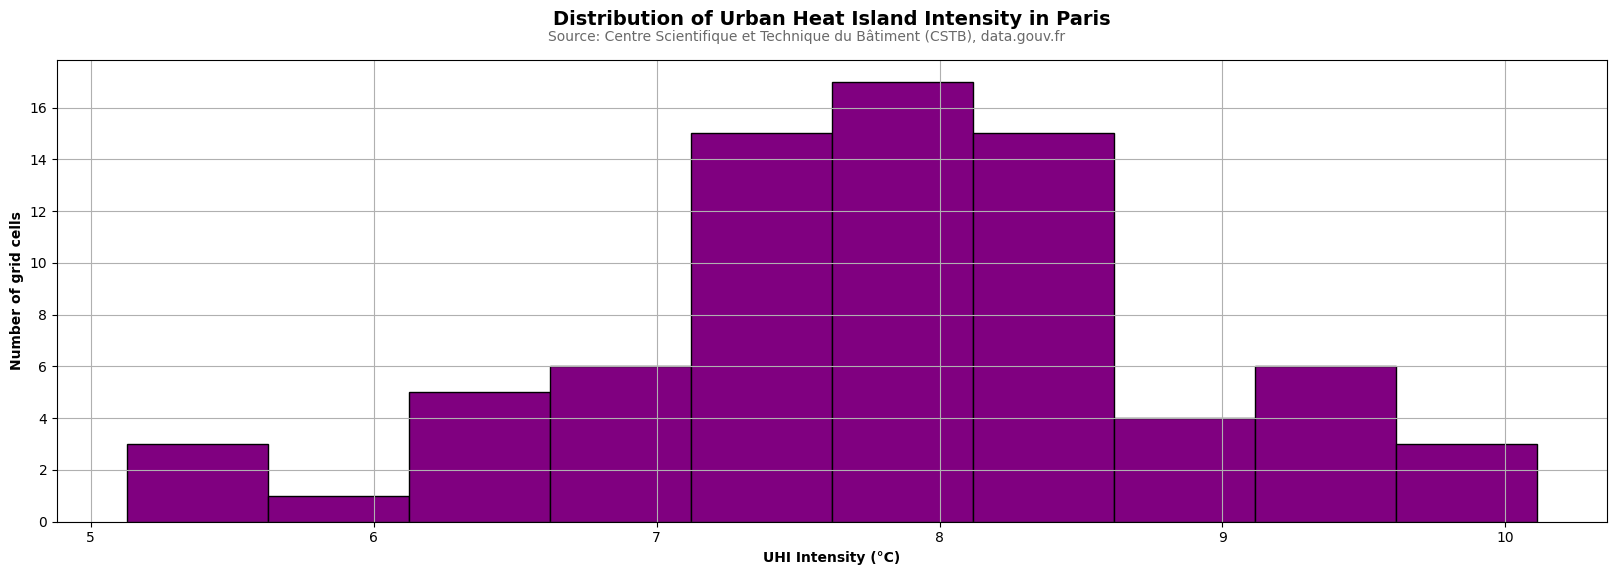

In [74]:
plt.figure(figsize=(20,6))
plt.hist(paris_selected['iuhi'], bins=10, color='purple', edgecolor='black')

plt.title('Distribution of Urban Heat Island Intensity in Paris', fontsize=14, weight='bold',pad=25)
plt.suptitle('Source: Centre Scientifique et Technique du Bâtiment (CSTB), data.gouv.fr',
             fontsize=10, y=0.93, color='dimgray')

plt.xlabel('UHI Intensity (°C)', fontweight='bold')
plt.ylabel('Number of grid cells', fontweight='bold')
plt.grid()
plt.show()

This histogram illustrates how the Urban Heat Island (UHI) intensity is distributed across different parts of Paris. Instead of analyzing the city as one single point, the dataset divides Paris into 75 small spatial units, called grid cells. Each grid cell represents a small area of the city (roughly a few hundred meters wide) where temperature and environmental conditions were measured separately.

On the x-axis, we see the UHI intensity in degrees Celsius (°C), which measures how much warmer that area is compared to nearby rural surroundings.
On the y-axis, we see the number of grid cells that fall within each intensity range. In other words, it tells us how many small areas of Paris experience a certain level of heat intensity.

The results show that most areas of Paris have UHI intensities between 7°C and 9°C, meaning that large parts of the city are significantly warmer than the surrounding countryside.
Only a few grid cells show lower intensities (around 5–6°C), which likely correspond to cooler zones such as parks, green spaces, or areas with less dense construction.
This pattern confirms that the urban heat island effect is widespread across Paris, with very few zones escaping elevated temperatures.



To better understand why some parts of Paris are hotter than others, we can explore how local environmental factors, especially vegetation, affect heat intensity. Vegetation helps regulate temperature by providing shade and moisture, which limits heat buildup on surfaces.
In the next step, we examine whether grid cells with more vegetation are indeed cooler, by comparing vegetation density with the Urban Heat Island intensity across Paris.

In [75]:
# Make sure iuhi and veg_den are numeric and drop missing values
uhi_veg = paris[['iuhi', 'veg_den']].apply(pd.to_numeric, errors='coerce').dropna()

corr = uhi_veg['iuhi'].corr(uhi_veg['veg_den'])
print(f"Correlation between vegetation density and UHI intensity: {corr:.2f}")

Correlation between vegetation density and UHI intensity: -0.81


The correlation value of –0.81 indicates a strong negative relationship between vegetation density and UHI intensity.
This means that as vegetation increases, heat intensity decreases. In other words, the greener an area is, the cooler it tends to be.
This result quantitatively supports the role of vegetation in reducing the urban heat island effect in Paris.

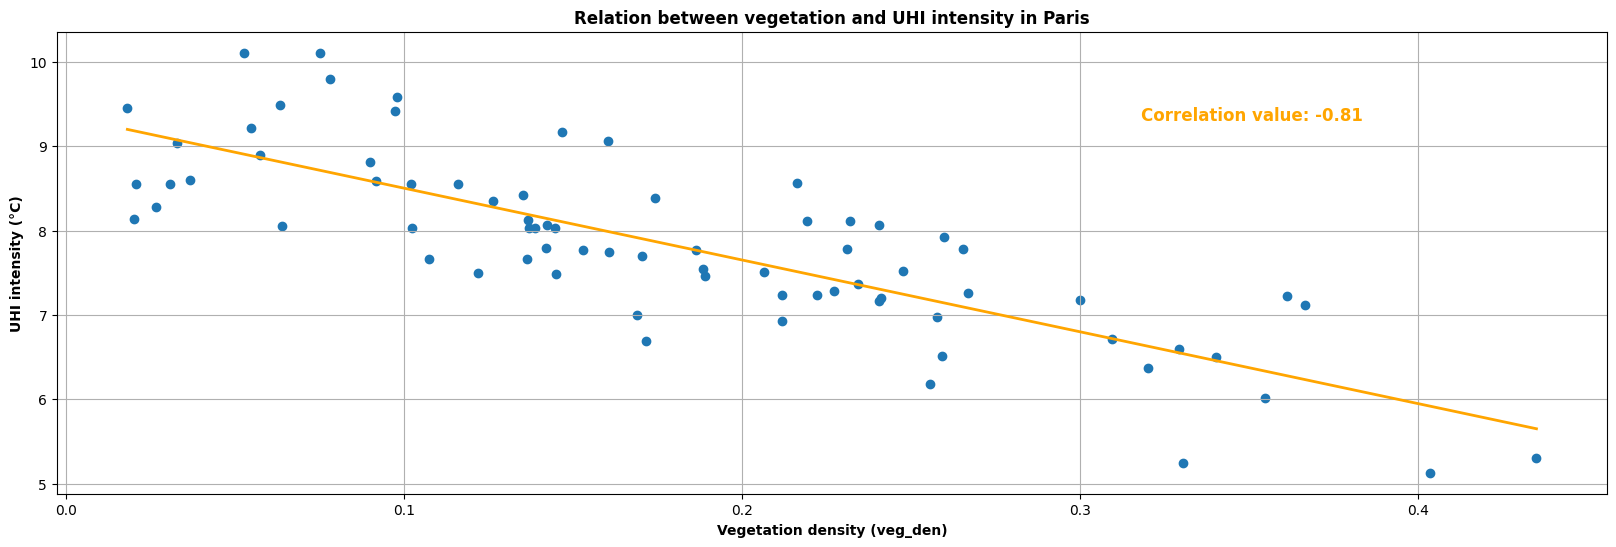

In [76]:
plt.figure(figsize=(20,6))
plt.scatter(uhi_veg['veg_den'], uhi_veg['iuhi'])
plt.xlabel('Vegetation density (veg_den)', fontweight='bold')
plt.ylabel('UHI intensity (°C)', fontweight='bold')
plt.title('Relation between vegetation and UHI intensity in Paris', fontweight='bold')
plt.grid(True)

# Optional: add simple trend line
m, b = np.polyfit(uhi_veg['veg_den'], uhi_veg['iuhi'], 1)
x_vals = np.linspace(uhi_veg['veg_den'].min(), uhi_veg['veg_den'].max(), 100)
plt.plot(x_vals, m * x_vals + b, color='orange', linewidth=2,)


# Adjust the text position to match your data range
x_text = uhi_veg['veg_den'].min() + 0.3
y_text = uhi_veg['iuhi'].max() - 0.8
plt.text(x_text, y_text, f"Correlation value: {corr:.2f}", color='orange', fontsize=12, weight='bold')


plt.show()


This scatter plot visually confirms the negative correlation observed earlier: areas with denser vegetation generally experience lower Urban Heat Island (UHI) intensity. The downward trend shows that vegetation helps limit heat accumulation in urban zones, meaning that parks and tree-covered areas contribute to cooling the city compared to more built-up neighborhoods.

## **2. Climate/environmental projections for the region**

### **Green Spaces**

In [77]:
file_path = "/content/drive/Shareddrives/Physics_Project/Data/2_Climate_environmental_projections_for_the_region/espaces_verts.csv"

espaces_verts = pd.read_csv(file_path, sep=';', encoding='utf-8')
espaces_verts.head()

,Identifiant espace vert,Nom de l'espace vert,Typologie d'espace vert,Catégorie,Adresse - Numéro,Adresse - Complément,Adresse - type voie,Adresse - Libellé voie,Code postal,Surface calculée,...,ID_ATELIER_HORTICOLE,IDA3D_ENB,SITE_VILLES,ID_EQPT,Compétence,Geo Shape,URL_PLAN,Geo point,last_edited_user,last_edited_date
0,11535.0,JARDIN PARTAGE LE JARDIN DE BONNE,"Ephémères, partagés, pédagogiques",Jardin partage,5.0,NaN,RUE,LEOPOLD BELLAN,75002.0,32.0,...,165.0,0,386,10388,CA,"{""coordinates"": [[[2.3467116537807717, 48.8663...",https://b22-pr-v1-iis01.ressources.paris.mdp/M...,"48.86638773075733, 2.3466418776593287",NaN,NaN
1,11503.0,JARDINIERES DE LA RUE PIERRE REBIERE,Décorations sur la voie publique,Jardiniere,51.0,NaN,RUE,PIERRE REBIERE,75017.0,447.0,...,170.0,JDE9949,SV,9949,CA,"{""coordinates"": [[[[2.3182864618860033, 48.896...",https://b22-pr-v1-iis01.ressources.paris.mdp/M...,"48.89694864937513, 2.3178498575332926",NaN,NaN
2,11853.0,JARDIN PARTAGE DU SQUARE DU SERMENT DE KOUFRA,"Ephémères, partagés, pédagogiques",Jardin partage,30.0,NaN,AVENUE,ERNEST REYER,75014.0,177.0,...,23.0,0,4031,0,0,"{""coordinates"": [[[2.323921851700017, 48.82132...",https://b22-pr-v1-iis01.ressources.paris.mdp/M...,"48.82127558084725, 2.324033784273737",NaN,NaN
3,10817.0,JARDINIERE DE LA PLACE BIENVENUE,Décorations sur la voie publique,Jardiniere,4.0,NaN,PLACE,BIENVENUE,75015.0,92.0,...,24.0,JDE7427,SV,7427,CA,"{""coordinates"": [[[2.3202494929770965, 48.8424...",https://b22-pr-v1-iis01.ressources.paris.mdp/M...,"48.842393718638206, 2.3203135935777763",NaN,NaN
4,11653.0,JARDINIERE VERTICALE DU 5 PASSAGE THIERE,Murs végétalisés,Murs vegetalises,5.0,NaN,PASSAGE,THIERE,75011.0,5.0,...,11.0,JDE9420,SV,9420,CP,"{""coordinates"": [[[2.3746059429285795, 48.8534...",https://b22-pr-v1-iis01.ressources.paris.mdp/M...,"48.8534616554614, 2.3745906845322104",NaN,NaN


In [78]:
espaces_verts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Identifiant espace vert      2436 non-null   float64
 1   Nom de l'espace vert         2444 non-null   object 
 2   Typologie d'espace vert      2444 non-null   object 
 3   Catégorie                    2440 non-null   object 
 4   Adresse - Numéro             2440 non-null   float64
 5   Adresse - Complément         368 non-null    object 
 6   Adresse - type voie          2197 non-null   object 
 7   Adresse - Libellé voie       2195 non-null   object 
 8   Code postal                  2442 non-null   float64
 9   Surface calculée             1961 non-null   float64
 10  Superficie totale réelle     1845 non-null   float64
 11  Surface horticole            1771 non-null   float64
 12  Présence cloture             2239 non-null   object 
 13  Périmètre         

In [79]:
# Display the different typologies of green spaces described
print(espaces_verts['Typologie d\'espace vert'].unique())

['Ephémères, partagés, pédagogiques' 'Décorations sur la voie publique'
 'Murs végétalisés' 'Promenades ouvertes' 'Périphérique'
 'Jardinets décoratifs' 'Jardins privatifs' 'Cimetières'
 'Etablissements sportifs' 'Bois']


Useless types of green spaces would be :
* **Décorations sur la voie publique:** These might be small or scattered and have limited vegetative cover, offering less significant cooling compared to larger green spaces.
* **Ephémères, partagés, pédagogiques:** The "ephemeral" nature might mean they are temporary and their overall impact on long-term cooling might be less consistent.

In [80]:
# Select the useful columns for our analysis
espaces_verts = espaces_verts[['Code postal', 'Typologie d\'espace vert', 'Surface calculée',
                              'Superficie totale réelle', 'Nombre d\'entités', 'Année de l\'ouverture']]

# Filter out less relevant typologies
typologies_to_drop = ['Décorations sur la voie publique', 'Ephémères, partagés, pédagogiques']
espaces_verts = espaces_verts[~espaces_verts['Typologie d\'espace vert'].isin(typologies_to_drop)].reset_index(drop=True)

# Filter out rows that are not Paris
espaces_verts = espaces_verts[espaces_verts['Code postal'].astype(str).str.startswith('75')].reset_index(drop=True)

espaces_verts.head()

,Code postal,Typologie d'espace vert,Surface calculée,Superficie totale réelle,Nombre d'entités,Année de l'ouverture
0,75011.0,Murs végétalisés,5.0,NaN,1.0,2010.0
1,75020.0,Promenades ouvertes,16416.0,16253.0,1.0,1986.0
2,75012.0,Périphérique,346.0,NaN,1.0,NaN
3,75011.0,Murs végétalisés,0.0,NaN,3.0,2007.0
4,75013.0,Périphérique,937.0,NaN,1.0,NaN


In [81]:
espaces_verts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Code postal               1365 non-null   float64
 1   Typologie d'espace vert   1365 non-null   object 
 2   Surface calculée          1167 non-null   float64
 3   Superficie totale réelle  919 non-null    float64
 4   Nombre d'entités          1364 non-null   float64
 5   Année de l'ouverture      993 non-null    float64
dtypes: float64(5), object(1)
memory usage: 64.1+ KB


Now, here's why each of these green spaces are actually useful:

* **Jardins privatifs:** Even small green spaces contribute to cooling through evapotranspiration and providing shade.
* **Bois:** Larger wooded areas have a significant cooling effect due to dense tree cover and evapotranspiration.
* **Promenades ouvertes:** These often include trees and vegetation, which can help cool the surrounding areas.
* **Jardinets décoratifs:** While smaller, these still provide some level of cooling and can improve air quality.
* **Murs végétalisés:** These are very effective in reducing building temperatures and the surrounding urban environment.
* **Cimetières:** Often contain a significant amount of green space and mature trees, contributing to cooling.

In [82]:
unique_years = sorted(espaces_verts['Année de l\'ouverture'].dropna().unique()) # Drop NaN before converting to int
unique_years_int = [int(year) for year in unique_years] # Convert to integer
print(unique_years_int)

[1688, 1791, 1798, 1800, 1804, 1808, 1820, 1824, 1825, 1828, 1831, 1833, 1835, 1844, 1852, 1854, 1856, 1857, 1859, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1872, 1873, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1884, 1885, 1886, 1889, 1890, 1891, 1893, 1894, 1896, 1899, 1900, 1904, 1905, 1906, 1907, 1909, 1910, 1911, 1912, 1913, 1914, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1947, 1948, 1950, 1951, 1954, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 9999]


In [83]:
display(espaces_verts[espaces_verts['Année de l\'ouverture'] == 9999])

,Code postal,Typologie d'espace vert,Surface calculée,Superficie totale réelle,Nombre d'entités,Année de l'ouverture
40,75019.0,Murs végétalisés,4.0,NaN,0.0,9999.0
326,75013.0,Promenades ouvertes,NaN,NaN,0.0,9999.0
339,75017.0,Murs végétalisés,10.0,NaN,0.0,9999.0
415,75015.0,Murs végétalisés,NaN,NaN,0.0,9999.0
448,75014.0,Jardins privatifs,NaN,2156.0,0.0,9999.0
480,75013.0,Promenades ouvertes,NaN,NaN,0.0,9999.0
541,75003.0,Murs végétalisés,5.0,NaN,0.0,9999.0
547,75013.0,Murs végétalisés,3.0,NaN,6.0,9999.0
548,75019.0,Murs végétalisés,NaN,NaN,1.0,9999.0
606,75011.0,Murs végétalisés,NaN,NaN,2.0,9999.0


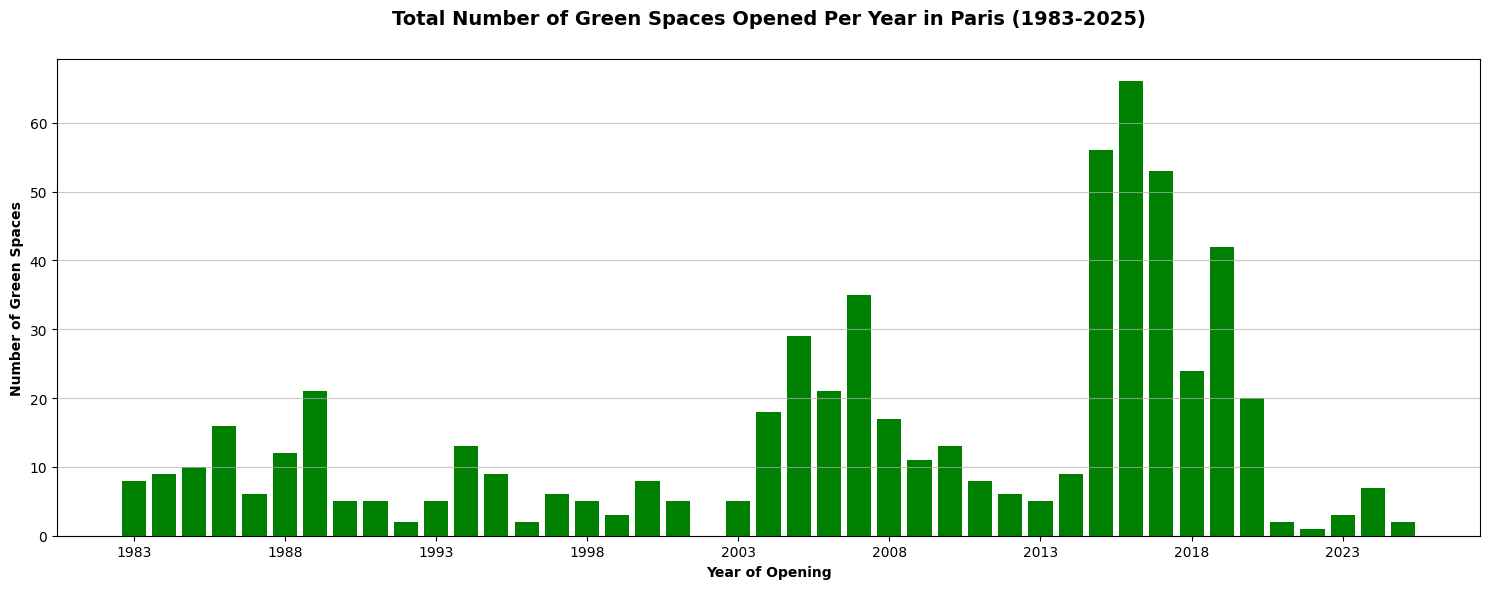

In [84]:
# Group the number of green spaces by the opening year
green_spaces_per_year = espaces_verts.groupby('Année de l\'ouverture').size().reset_index(name='Number of Green Spaces')

# Remove the rows with the outlier year 1688 and 9999
green_spaces_per_year = green_spaces_per_year[green_spaces_per_year['Année de l\'ouverture'] != 9999]
green_spaces_per_year = green_spaces_per_year[green_spaces_per_year['Année de l\'ouverture'] != 1688]

# Filter for the years between 1983 and 2025
green_spaces_per_year_filtered = green_spaces_per_year[(green_spaces_per_year['Année de l\'ouverture'] >= 1983) & (green_spaces_per_year['Année de l\'ouverture'] <= 2025)].reset_index(drop=True)


# Plot the total number of green spaces opened per year for the filtered period
plt.figure(figsize=(15, 6))
plt.bar(green_spaces_per_year_filtered['Année de l\'ouverture'], green_spaces_per_year_filtered['Number of Green Spaces'], color='green')

plt.title('Total Number of Green Spaces Opened Per Year in Paris (1983-2025)', fontsize=14, fontweight='bold', pad=25)
plt.xlabel('Year of Opening', fontweight='bold')
plt.ylabel('Number of Green Spaces', fontweight='bold')
plt.xticks(np.arange(green_spaces_per_year_filtered['Année de l\'ouverture'].min(), green_spaces_per_year_filtered['Année de l\'ouverture'].max()+1, 5)) # set x-axis ticks every 5 years
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [85]:
# Getting the number of green spaces opened between 2002, 2003 and 2004
green_spaces_02_03_04 = green_spaces_per_year[green_spaces_per_year['Année de l\'ouverture'].isin([2002, 2003, 2004])]
display(green_spaces_02_03_04)

,Année de l'ouverture,Number of Green Spaces
132,2003.0,5
133,2004.0,18


Since the 2003 heatwave incident, Paris increased its opening of green spaces by 5 in 2003 by 13 in 2004.

In [86]:
# Define the periods
start_year_old = 1982
end_year_old = 2002
start_year_recent = 2003
end_year_recent = 2025

# Filter the green_spaces_per_year DataFrame for each period
green_spaces_old_period = green_spaces_per_year[(green_spaces_per_year['Année de l\'ouverture'] >= start_year_old) & (green_spaces_per_year['Année de l\'ouverture'] <= end_year_old)]
green_spaces_recent_period = green_spaces_per_year[(green_spaces_per_year['Année de l\'ouverture'] >= start_year_recent) & (green_spaces_per_year['Année de l\'ouverture'] <= end_year_recent)]

# Calculate the average number of green spaces opened per year in each period
average_green_spaces_old = green_spaces_old_period['Number of Green Spaces'].mean()
average_green_spaces_recent = green_spaces_recent_period['Number of Green Spaces'].mean()

# Display the results
print(f"Average number of green spaces opened per year ({start_year_old}-{end_year_old}): {average_green_spaces_old:.2f}")
print(f"Average number of green spaces opened per year ({start_year_recent}-{end_year_recent}): {average_green_spaces_recent:.2f}")

Average number of green spaces opened per year (1982-2002): 7.90
Average number of green spaces opened per year (2003-2025): 19.70


The average between the timelines of 1982-2002 and 2003-2025 has increased from 7.9 green spaces to 19.7 green spaces per year \
--> an increase of 12 green spaces per year approximately.

In [87]:
# Group by postal code and sum the calculated area
green_space_area_by_postal_code = espaces_verts.groupby('Code postal')['Surface calculée'].sum().reset_index()
display(green_space_area_by_postal_code)

,Code postal,Surface calculée
0,75001.0,25268.0
1,75002.0,4377.0
2,75003.0,26945.0
3,75004.0,64533.0
4,75005.0,65255.0
5,75006.0,30185.0
6,75007.0,377408.0
7,75008.0,221583.0
8,75009.0,15190.0
9,75010.0,55228.0


In [88]:
# Calculate the average green space area across all postal codes
average_green_space_area = green_space_area_by_postal_code['Surface calculée'].mean()

print(f"The average green space area across all Paris postal codes is: {average_green_space_area:,.2f} m²")

The average green space area across all Paris postal codes is: 1,230,274.85 m²


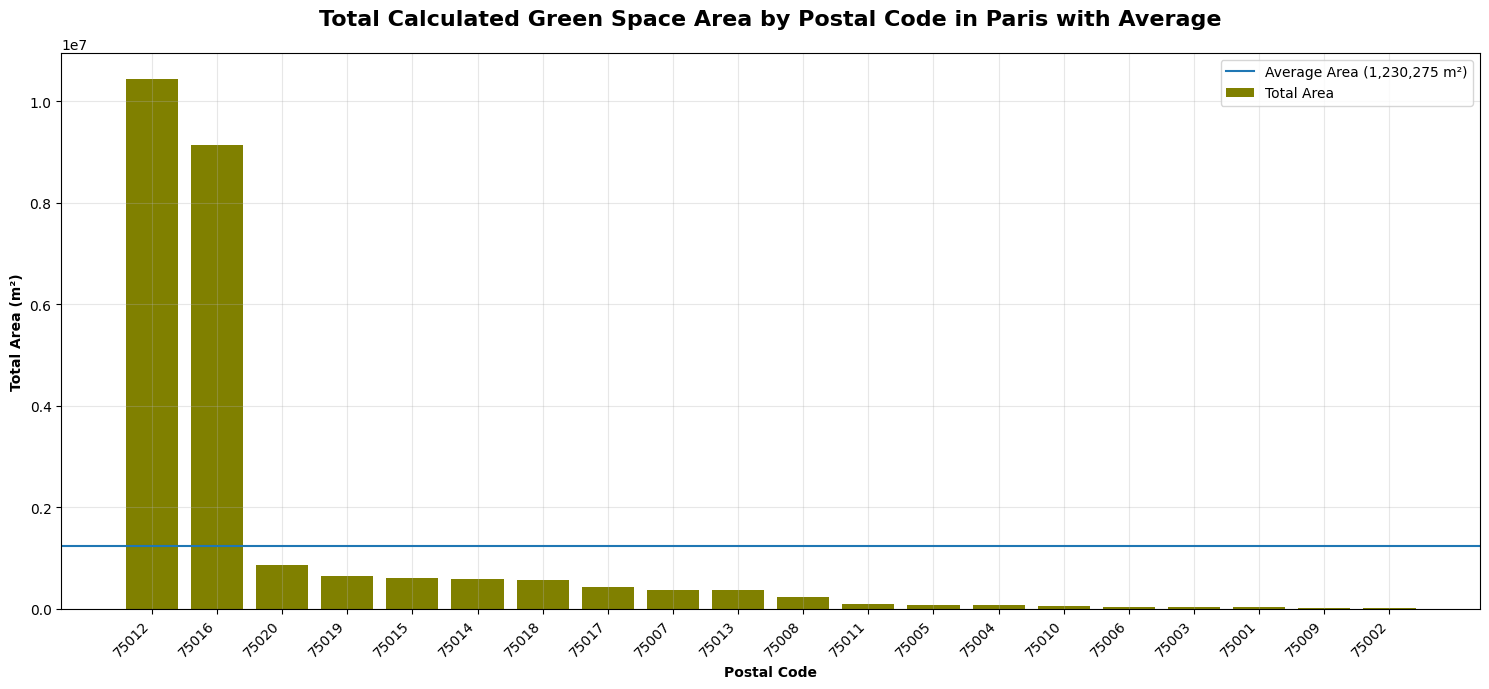

In [89]:
# Sort the data by total area for better visualization
green_space_area_by_postal_code = green_space_area_by_postal_code.sort_values(by='Surface calculée', ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 7))
plt.bar(green_space_area_by_postal_code['Code postal'].astype(int).astype(str), green_space_area_by_postal_code['Surface calculée'], color='olive', label='Total Area')

# Add a horizontal line for the average green space area
plt.axhline(y=average_green_space_area, linestyle='-', label=f'Average Area ({average_green_space_area:,.0f} m²)')

plt.title('Total Calculated Green Space Area by Postal Code in Paris with Average', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Postal Code', fontweight='bold')
plt.ylabel('Total Area (m²)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [90]:
# Calculate the standard deviation of the green space area
std_green_space_area = green_space_area_by_postal_code['Surface calculée'].std()

# Define a threshold for outliers (e.g., 2 or 3 standard deviations from the mean)
# Let's use 2 standard deviations for this example
threshold = 2 * std_green_space_area

# Calculate upper and lower bounds for outliers
upper_bound = average_green_space_area + threshold
lower_bound = average_green_space_area - threshold # Although likely not needed for lower bound with area data

print(f"Upper Bound for Outliers: {upper_bound:,.0f} m²")
# print(f"Lower Bound for Outliers: {lower_bound:,.0f} m²") # Lower bound might not be relevant for area being > 0

# Identify outliers (postal codes with area significantly above the average)
outlier_postal_codes = green_space_area_by_postal_code[(green_space_area_by_postal_code['Surface calculée'] > upper_bound)] # Focusing on upper outliers for area

display(outlier_postal_codes)

# Filter out the outliers to calculate the average without them
green_space_area_by_postal_code_filtered = green_space_area_by_postal_code[~green_space_area_by_postal_code['Code postal'].isin(outlier_postal_codes['Code postal'])]

# Calculate the average green space area excluding outliers
average_green_space_area_filtered = green_space_area_by_postal_code_filtered['Surface calculée'].mean()

print(f"\nAverage Green Space Area Excluding Outliers: {average_green_space_area_filtered:,.0f} m²")

Upper Bound for Outliers: 7,121,979 m²


,Code postal,Surface calculée
11,75012.0,10435847.0
15,75016.0,9140448.0



Average Green Space Area Excluding Outliers: 279,400 m²


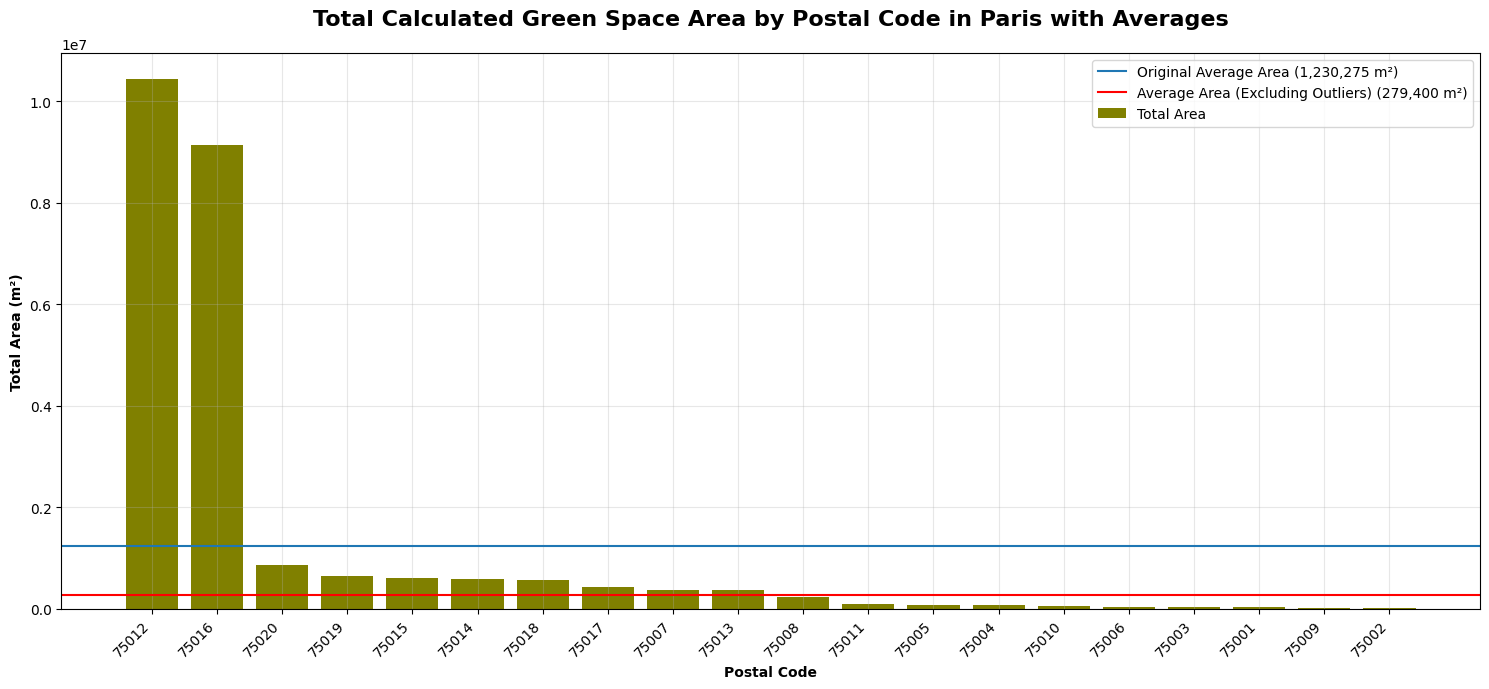

In [91]:
# Sort the data by total area for better visualization
green_space_area_by_postal_code = green_space_area_by_postal_code.sort_values(by='Surface calculée', ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 7))
plt.bar(green_space_area_by_postal_code['Code postal'].astype(int).astype(str), green_space_area_by_postal_code['Surface calculée'], color='olive', label='Total Area')

# Add a horizontal line for the original average green space area
plt.axhline(y=average_green_space_area, linestyle='-', label=f'Original Average Area ({average_green_space_area:,.0f} m²)')

# Add a horizontal line for the average green space area excluding outliers
# Ensure average_green_space_area_filtered is calculated before this cell is run
plt.axhline(y=average_green_space_area_filtered, color='red', linestyle='-', label=f'Average Area (Excluding Outliers) ({average_green_space_area_filtered:,.0f} m²)')


plt.title('Total Calculated Green Space Area by Postal Code in Paris with Averages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Postal Code', fontweight='bold')
plt.ylabel('Total Area (m²)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

We can deduce that the 12th and 16th departments are significantly more covered in green spaces than the rest of Paris. This higher coverage in these areas causes a notable difference in the average green space area across all arrondissements compared to the average when these outliers are excluded (a difference of approximately 950,874 m²). This highlights the need for the other arrondissements to expand their green coverage to fight against Paris' heat island effect, particularly those with the lowest green space areas, such as the 2nd, 9th, 1st, 3rd, 6th, 10th, 4th, 5th, 11th, and 8th arrondissements.

### **Paris TRACC**

In [92]:
file_path = "/content/drive/Shareddrives/Physics_Project/Data/2_Climate_environmental_projections_for_the_region/Paris_TRACC_2030.csv"

# Read the first 30 lines of the file as plain text to inspect
with open(file_path, 'r', encoding='latin-1') as f:
    for i in range(30):
        print(f.readline(), end='')

#-----------------------------------------------------------------------------
# Date d'extraction : 07/11/2025 - 10h47 loc.
#-----------------------------------------------------------------------------
# Producteur : MF_DCSC
# Experience : TRACC2023
# Modele     : CCLM4-8-17_MPI-ESM
#-----------------------------------------------------------------------------
# Niveaux de rÃ©chauffement :
#     GWL15 (2037-2056) : Niveau de rÃ©chauffement Monde 1.5 degrÃ©s -> 2030 / France +2Â°C
#-----------------------------------------------------------------------------
# Type d'indice : annuel
#-----------------------------------------------------------------------------
# Indices : 
#     TMm_yr : TempÃ©rature moyenne annuelle (Â°C)
#     TX35D_yr : Nombre de jours avec Tx >= 35Â°C (jour(s))
#     TX30D_yr : Nombre de jours avec Tx >= 30Â°C (jour(s))
#     IFM40_yr : Indicateur feux mÃ©tÃ©o nombre de jours supÃ©rieurs Ã  40 (jour(s))
#     ECARTTMm_yr : Ecart de tempÃ©rature moyenne annuelle (Â

In [93]:
# Define the column names based on the header line in the file
column_names = ['Point', 'Latitude', 'Longitude', 'Niveau', 'Annee', 'TMm_yr', 'TX35D_yr', 'TX30D_yr', 'IFM40_yr', 'ECARTTMm_yr', 'ECARTTX35D_yr', 'ECARTTX30D_yr']

# Read the CSV file, skipping comment lines and using the defined column names
paris_tracc = pd.read_csv(file_path, sep=';', encoding='latin-1', comment='#', skiprows=[28], names=column_names, index_col=False)

paris_tracc = paris_tracc.drop(columns=['Point', 'Latitude', 'Longitude', 'Niveau'])

display(paris_tracc)

,Annee,TMm_yr,TX35D_yr,TX30D_yr,IFM40_yr,ECARTTMm_yr,ECARTTX35D_yr,ECARTTX30D_yr
0,2037,11.99,0,5,0,-0.35,-0.5,-3.9
1,2038,13.89,0,20,1,1.56,-0.5,11.1
2,2039,12.79,4,16,0,0.45,3.5,7.1
3,2040,12.83,0,7,0,0.50,-0.5,-1.9
4,2042,13.86,11,21,9,1.53,10.5,12.1
...,...,...,...,...,...,...,...,...
74,2052,12.24,1,7,4,-0.03,0.5,-1.9
75,2053,14.11,1,25,5,1.85,0.5,16.1
76,2054,14.10,6,34,5,1.83,5.5,25.1
77,2055,14.90,2,17,4,2.63,1.5,8.1


In [94]:
paris_tracc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Annee          79 non-null     int64  
 1   TMm_yr         79 non-null     float64
 2   TX35D_yr       79 non-null     int64  
 3   TX30D_yr       79 non-null     int64  
 4   IFM40_yr       79 non-null     int64  
 5   ECARTTMm_yr    79 non-null     float64
 6   ECARTTX35D_yr  79 non-null     float64
 7   ECARTTX30D_yr  79 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 5.1 KB


**Description of the columns:**
* TMm_yr : Average ananual temperature (°C)
* TX35D_yr : Number of days where Tx >= 35°C (day(s))
* TX30D_yr : Number of days where Tx >= 30°C (day(s))
* IFM40_yr (Indicateur feux météo) : Number of days  where Tx >= 40°C
* ECARTTMm_yr : Annual average temperature range (°C)
* ECARTTX35D_yr : Shows how many more hot days (>35°C) are expected compared to the year before
* ECARTTX30D_yr : Shows how many more hot days (>30°C) are expected compared to the year before

This dataset regroups information at 4 points in Paris so to get the average in Paris, we are going to group by year.

In [95]:
# Group by year and calculate the average for each year
paris_tracc_avg = paris_tracc.groupby('Annee').mean().reset_index()

# Display the resulting dataframe
display(paris_tracc_avg)

,Annee,TMm_yr,TX35D_yr,TX30D_yr,IFM40_yr,ECARTTMm_yr,ECARTTX35D_yr,ECARTTX30D_yr
0,2037,12.0525,0.00,5.25,0.000000,-0.347500,-0.600000,-4.075000
1,2038,13.9600,0.00,20.00,1.750000,1.565000,-0.600000,10.675000
2,2039,12.8625,3.75,16.75,0.000000,0.462500,3.150000,7.425000
3,2040,12.8950,0.00,7.25,0.000000,0.500000,-0.600000,-2.075000
4,2041,13.1800,0.00,9.00,2.666667,0.766667,-0.633333,-0.466667
5,2042,13.9300,11.25,22.50,10.250000,1.535000,10.650000,13.175000
6,2043,13.8575,1.00,9.25,0.000000,1.465000,0.400000,-0.075000
7,2044,13.3675,1.00,6.50,3.750000,0.975000,0.400000,-2.825000
8,2045,13.2425,2.00,14.50,0.000000,0.847500,1.400000,5.175000
9,2046,12.6650,0.00,6.50,0.000000,0.270000,-0.600000,-2.825000


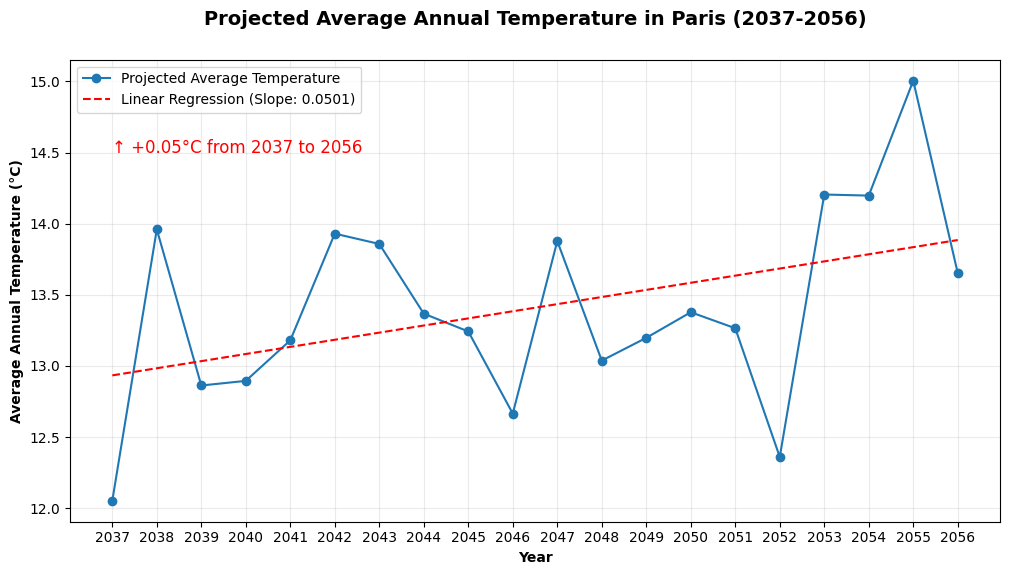

In [96]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(paris_tracc_avg['Annee'], paris_tracc_avg['TMm_yr'])
year_start = 2037
year_end = 2056

plt.figure(figsize=(12, 6))
plt.plot(paris_tracc_avg['Annee'], paris_tracc_avg['TMm_yr'], marker='o', linestyle='-', label='Projected Average Temperature')

# Add the linear regression line
plt.plot(paris_tracc_avg['Annee'], slope * paris_tracc_avg['Annee'] + intercept, color='red', linestyle='--', label=f'Linear Regression (Slope: {slope:.4f})')

plt.title('Projected Average Annual Temperature in Paris (2037-2056)', fontsize=14, fontweight='bold', pad=25)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Annual Temperature (°C)', fontweight='bold')
plt.xticks(paris_tracc_avg['Annee'])

plt.text(2037, 14.5,
         f"↑ +{slope:.2f}°C from {year_start} to {year_end}",
         fontsize=12, color='red')

plt.grid(alpha = 0.25)
plt.legend()
plt.show()

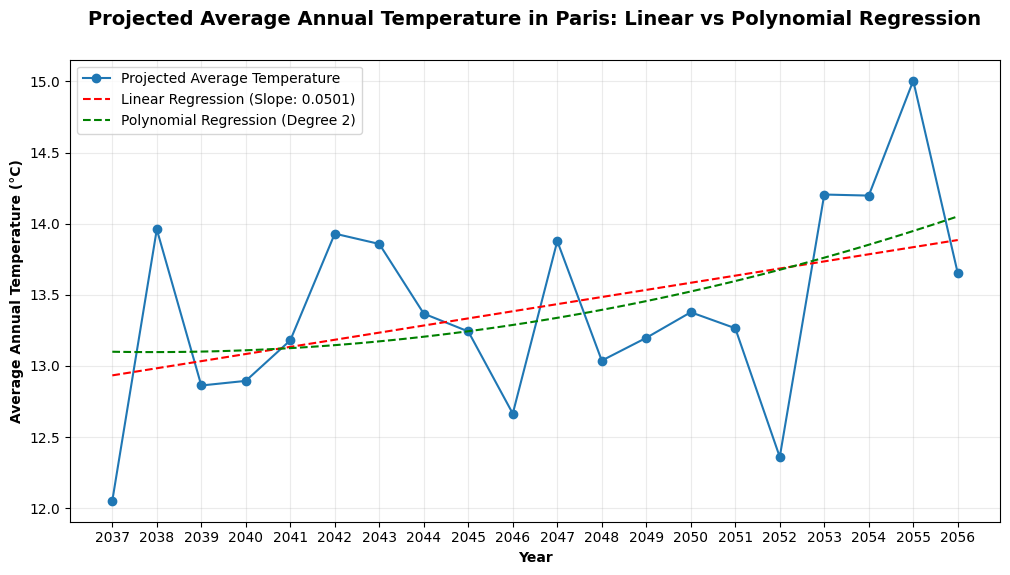

In [97]:

slope_linear, intercept_linear, _, _, _ = linregress(paris_tracc_avg['Annee'], paris_tracc_avg['TMm_yr'])

degree = 2 # Assuming degree 2 from the previous polynomial fit
poly_coeffs = np.polyfit(paris_tracc_avg['Annee'], paris_tracc_avg['TMm_yr'], degree)
poly_model = np.poly1d(poly_coeffs)

# Predict the temperature values using the polynomial model for plotting
years_pred = np.linspace(paris_tracc_avg['Annee'].min(), paris_tracc_avg['Annee'].max(), 100)
temp_pred_poly = poly_model(years_pred)

plt.figure(figsize=(12, 6))
plt.plot(paris_tracc_avg['Annee'], paris_tracc_avg['TMm_yr'], marker='o', linestyle='-', label='Projected Average Temperature')

# Plot Linear Regression line
plt.plot(paris_tracc_avg['Annee'], slope_linear * paris_tracc_avg['Annee'] + intercept_linear, color='red', linestyle='--', label=f'Linear Regression (Slope: {slope_linear:.4f})')

# Plot Polynomial Regression line
plt.plot(years_pred, temp_pred_poly, color='green', linestyle='--', label=f'Polynomial Regression (Degree {degree})')


plt.title('Projected Average Annual Temperature in Paris: Linear vs Polynomial Regression', fontsize=14, fontweight='bold', pad=25)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Annual Temperature (°C)', fontweight='bold')
plt.xticks(paris_tracc_avg['Annee'])
plt.grid(alpha = 0.25)
plt.legend()
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Metrics
# Ensure slope_linear and intercept_linear are available (run cell fe0a7333 if needed)
y_true_linear = paris_tracc_avg['TMm_yr']
y_pred_linear = slope_linear * paris_tracc_avg['Annee'] + intercept_linear
mse_linear = mean_squared_error(y_true_linear, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_true_linear, y_pred_linear)

print("Linear Regression Metrics:")
print(f"  R-squared: {r2_linear:.4f}")
print(f"  Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.4f}")

# Polynomial Regression Metrics
# Ensure poly_model is available (run cell 83f945b1 if needed)
y_true_poly = paris_tracc_avg['TMm_yr']
y_pred_poly = poly_model(paris_tracc_avg['Annee'])
mse_poly = mean_squared_error(y_true_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_true_poly, y_pred_poly)

print("\nPolynomial Regression (Degree 2) Metrics:")
print(f"  R-squared: {r2_poly:.4f}")
print(f"  Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_poly:.4f}")

Linear Regression Metrics:
  R-squared: 0.1812
  Mean Squared Error (MSE): 0.3767
  Root Mean Squared Error (RMSE): 0.6137

Polynomial Regression (Degree 2) Metrics:
  R-squared: 0.1975
  Mean Squared Error (MSE): 0.3692
  Root Mean Squared Error (RMSE): 0.6076


* R-squared: Polynomial (0.1975) is slightly higher than Linear (0.1812). A higher R-squared means the model explains more of the variation in the data.
* MSE & RMSE: Polynomial (MSE: 0.3692, RMSE: 0.6076) are slightly lower than Linear (MSE: 0.3767, RMSE: 0.6137). Lower MSE and RMSE values indicate less error in the model's predictions.

Based on these metrics, the Polynomial Regression (Degree 2) is a slightly better fit for this projected temperature data from 2037 to 2056.

The projected average annual temperature in Paris is expected to continue to rise between 2037 and 2056. The slight upward curve suggests that the rate of warming might not be constant over these years; it could potentially be accelerating or decelerating within this specific timeframe. \
Either way, this continued warming trend has significant implications for the city :
* Increased frequency and intensity of heatwaves: Higher average temperatures contribute to more frequent and intense heatwave events.
* Exacerbation of the urban heat island effect: As the background temperature rises due to climate change, the urban heat island effect (where the city is warmer than surrounding rural areas) is likely to become more pronounced.
* Impacts on ecosystems and water resources: Changes in temperature can affect local ecosystems, water availability, and the timing of seasonal events.

In [99]:
# Create new columns for temperature ranges
paris_tracc_avg['Days 30-35C'] = paris_tracc_avg['TX30D_yr'] - paris_tracc_avg['TX35D_yr']
paris_tracc_avg['Days > 35C'] = paris_tracc_avg['TX35D_yr']

paris_tracc_avg = paris_tracc_avg.drop(columns=['TX30D_yr', 'TX35D_yr'])

display(paris_tracc_avg.head())

,Annee,TMm_yr,IFM40_yr,ECARTTMm_yr,ECARTTX35D_yr,ECARTTX30D_yr,Days 30-35C,Days > 35C
0,2037,12.0525,0.000000,-0.347500,-0.600000,-4.075000,5.25,0.00
1,2038,13.9600,1.750000,1.565000,-0.600000,10.675000,20.00,0.00
2,2039,12.8625,0.000000,0.462500,3.150000,7.425000,13.00,3.75
3,2040,12.8950,0.000000,0.500000,-0.600000,-2.075000,7.25,0.00
4,2041,13.1800,2.666667,0.766667,-0.633333,-0.466667,9.00,0.00


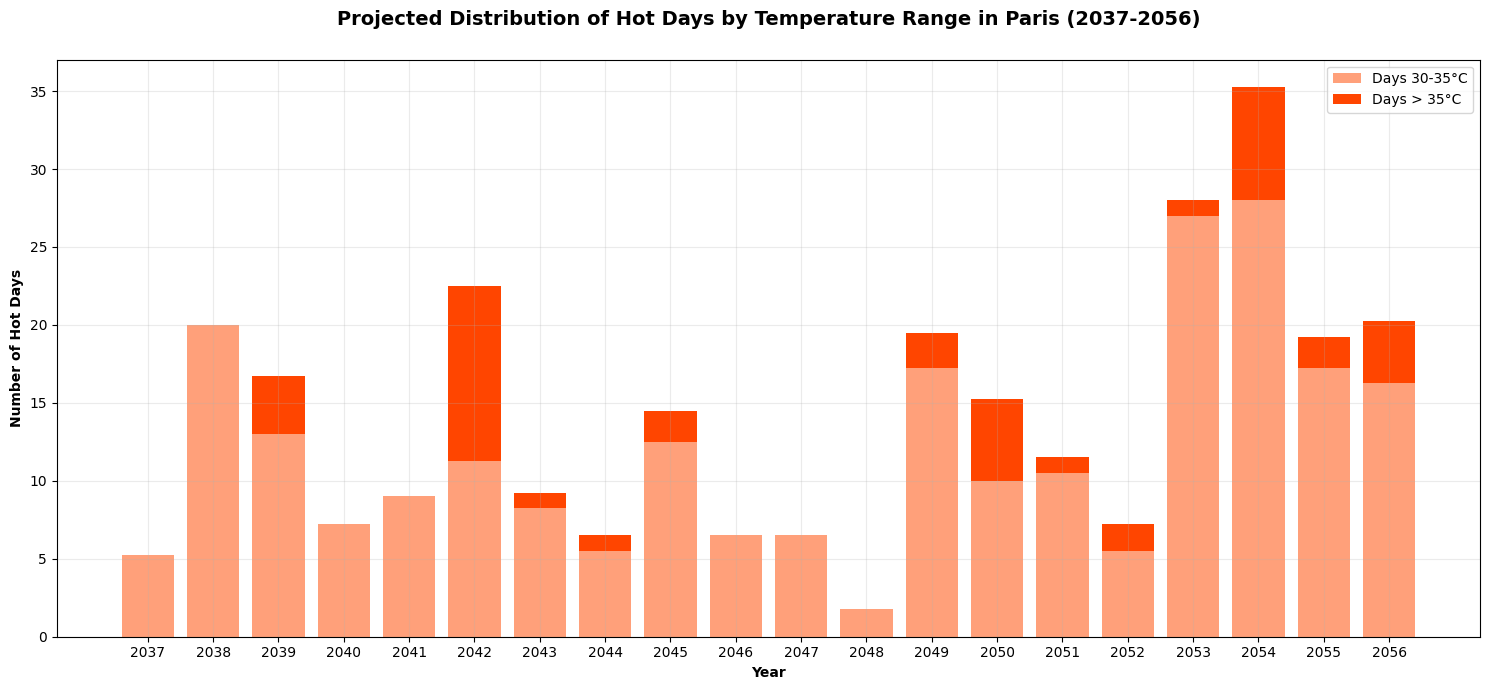

In [100]:
plt.figure(figsize=(15, 7))

plt.bar(paris_tracc_avg['Annee'], paris_tracc_avg['Days 30-35C'], label='Days 30-35°C', color='lightsalmon')
plt.bar(paris_tracc_avg['Annee'], paris_tracc_avg['Days > 35C'], bottom=paris_tracc_avg['Days 30-35C'], label='Days > 35°C', color='orangered')

plt.title('Projected Distribution of Hot Days by Temperature Range in Paris (2037-2056)', fontsize=14, fontweight='bold', pad=25)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Hot Days', fontweight='bold')
plt.xticks(paris_tracc_avg['Annee'])
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

Hot days in Paris will become more frequent but also highly variable, with some years experiencing sharp spikes in heat. Most of the increase comes from 30–35°C days, while extreme >35°C events appear in irregular surges that can drive intense heatwave seasons.

,Annee,TMm_yr,IFM40_yr,Days 30-35C,Days > 35C
Annee,1.000000,0.425733,0.173009,0.397410,0.201681
TMm_yr,0.425733,1.000000,0.353736,0.631107,0.308686
IFM40_yr,0.173009,0.353736,1.000000,0.405941,0.616261
Days 30-35C,0.397410,0.631107,0.405941,1.000000,0.343928
Days > 35C,0.201681,0.308686,0.616261,0.343928,1.000000


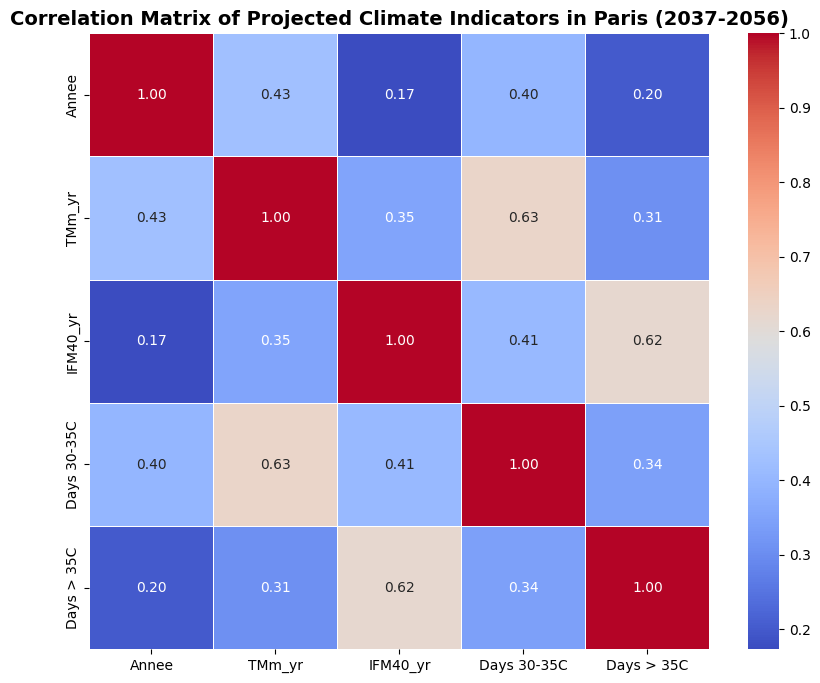

In [101]:
# Drop the 'ECART' columns before calculating the correlation matrix
paris_tracc_avg_filtered = paris_tracc_avg.drop(columns=['ECARTTMm_yr', 'ECARTTX35D_yr', 'ECARTTX30D_yr'])

# Calculate the correlation matrix for the filtered data
correlation_matrix = paris_tracc_avg_filtered.corr()

# Display the correlation matrix
display(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Projected Climate Indicators in Paris (2037-2056)', fontsize=14, fontweight='bold')
plt.show()

* Days 30–35°C & Annual mean temperature (0.63) \
→ Warmer years strongly increase the number of moderate hot days. \
→ Moderate heat rises more predictably than extreme heat.

* Days >35°C & Fire-weather index IFM40 (0.62) \
→ Years with more extreme heat days show significantly higher fire risk. \
→ Extreme heat is a major driver of dangerous fire-weather conditions.

### **3. Socioeconomic data (population, GDP, vulnerability indices)**

The purpose of this section is to quantify the human and social vulnerability to heat in Paris thus it is to show which populations are most at risk when extreme heat occurs.

To what extent are the most heat-exposed arrondissements also the most socioeconomically vulnerable, and have adaptation measures been targeted toward these zones?

**Cleaning and preparing data**

In [102]:
income = pd.read_csv('/content/drive/Shareddrives/Physics_Project/Data/3_Socioeconomic_data_(population, GDP, vulnerability indices)/paris_income_by_arrondissement.csv')

income = income.drop('Category', axis =1)

income['postal_code'] = income['Arrondissement'].str.extract(r'(\d{5})').astype(int)

population = pd.read_csv(
    '/content/drive/Shared drives/Physics_Project/Data/3_Socioeconomic_data_(population, GDP, vulnerability indices)/populations-legales-communes-et-arrondissements-municipaux-millesime-ile-de-fran.csv',
    sep=';',
    encoding='utf-8'
)

population.head()


,Code Officiel Région,Nom Officiel Région,Code Officiel Commune / Arrondissement Municipal,Nom Officiel Commune / Arrondissement Municipal,Population municipale,Population comptée à part,Population totale,Code Officiel Département,Code Officiel Arrondissement Départemental,Année de recensement,Année d’entrée en vigueur,Année de référence géographique,Nom Officiel EPCI,Code Officiel EPCI,Nom Officiel Département
0,11,Île-de-France,75106,Paris 6e Arrondissement,39625,827,40452,75,1,2020,2023,2022,Métropole du Grand Paris,200054781,Paris
1,11,Île-de-France,75114,Paris 14e Arrondissement,133967,959,134926,75,1,2020,2023,2022,Métropole du Grand Paris,200054781,Paris
2,11,Île-de-France,75113,Paris 13e Arrondissement,177833,1180,179013,75,1,2020,2023,2022,Métropole du Grand Paris,200054781,Paris
3,11,Île-de-France,75110,Paris 10e Arrondissement,83459,414,83873,75,1,2020,2023,2022,Métropole du Grand Paris,200054781,Paris
4,11,Île-de-France,75118,Paris 18e Arrondissement,191135,776,191911,75,1,2020,2023,2022,Métropole du Grand Paris,200054781,Paris


In [103]:
# Keep only what we need
population = population[['Code Officiel Commune / Arrondissement Municipal',
                         'Nom Officiel Commune / Arrondissement Municipal',
                         'Population municipale']].copy()

population.columns = ['insee_code', 'arrondissement_name', 'population']

# Convert to int
population['insee_code'] = population['insee_code'].astype(int)

# Convert 75101 → 75001, etc.
population['postal_code'] = population['insee_code'] - 100

population.head()


,insee_code,arrondissement_name,population,postal_code
0,75106,Paris 6e Arrondissement,39625,75006
1,75114,Paris 14e Arrondissement,133967,75014
2,75113,Paris 13e Arrondissement,177833,75013
3,75110,Paris 10e Arrondissement,83459,75010
4,75118,Paris 18e Arrondissement,191135,75018


In [104]:
# income + green space
merged = pd.merge(
    income,
    green_space_area_by_postal_code,
    left_on='postal_code',
    right_on='Code postal',
    how='left'
)
merged = merged.drop(columns=['Code postal'])

# add population
merged = pd.merge(
    merged,
    population[['postal_code', 'population']],
    on='postal_code',
    how='left'
)

merged.head()



,Arrondissement,Income (€ / UC),postal_code,Surface calculée,population
0,Paris 7e (75007),4358,75007,377408.0,48520
1,Paris 8e (75008),4255,75008,221583.0,35631
2,Paris 6e (75006),3926,75006,30185.0,39625
3,Paris 16e (75016),3926,75016,9140448.0,162820
4,Paris 5e (75005),3313,75005,65255.0,57380


In [ ]:
corr = merged['Income (€ / UC)'].corr(merged['green_per_capita'])
print(f"Correlation between income and green space per capita: {corr:.3f}")


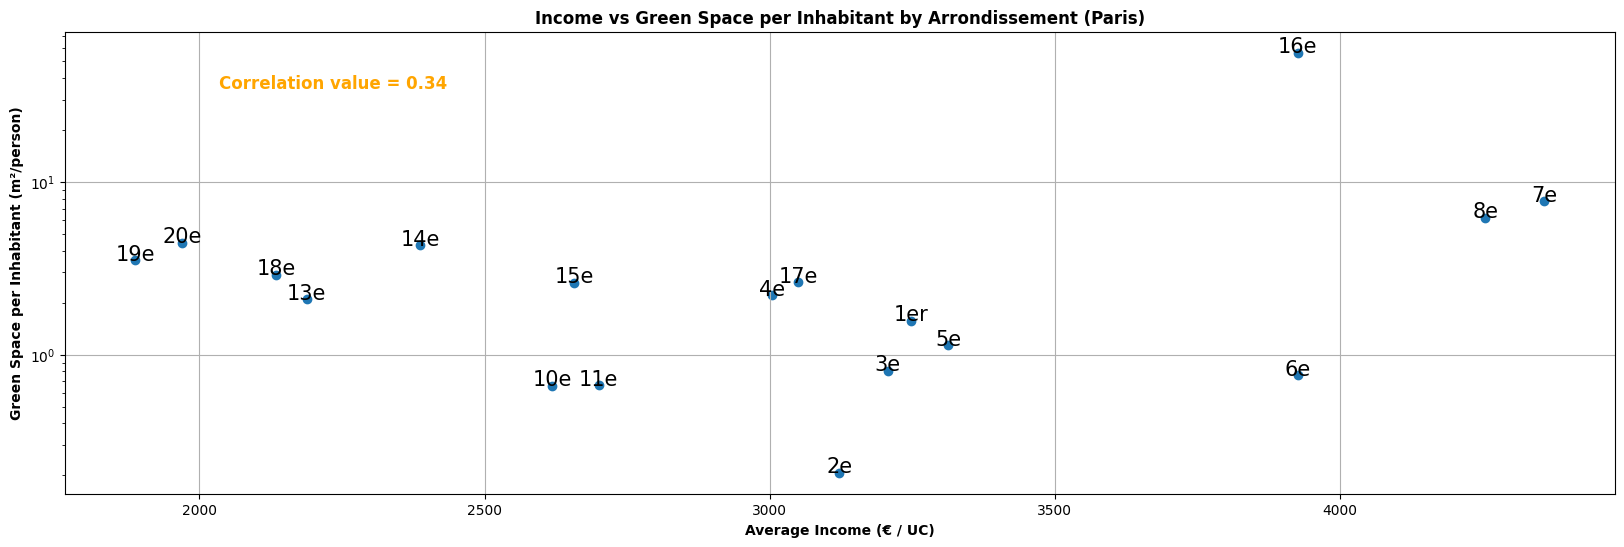

In [127]:
merged['green_per_capita'] = merged['Surface calculée'] / merged['population']

plt.figure(figsize=(20,6))
plt.scatter(merged['Income (€ / UC)'], merged['green_per_capita'])

for i, row in merged.iterrows():
    plt.text(row['Income (€ / UC)'], row['green_per_capita'],
             row['Arrondissement'].split()[1], fontsize=15, ha='center')

# add correlation text directly on the graph
plt.text(
    2035, 35,  # (x, y) coordinates → adjust depending on your data scale
    f"Correlation value = {corr:.2f}",
    fontsize=12,
    color='orange',
    weight='bold'
)

plt.xscale('linear')
plt.yscale('log')

plt.xlabel('Average Income (€ / UC)', fontweight='bold')
plt.ylabel('Green Space per Inhabitant (m²/person)', fontweight='bold')
plt.title('Income vs Green Space per Inhabitant by Arrondissement (Paris)', fontweight='bold')
plt.grid(True)
plt.show()


## **4. Cost-benefit analysis of adaptation measures**

In [107]:
file_path = "/content/drive/Shareddrives/Physics_Project/Data/4_Cost-benefit_analysis_of_adaptation_measures/evaluation-climat-du-budget-d-ela-collectivite.csv"

evaluation_budget = pd.read_csv(file_path, sep=';', encoding='utf-8')
evaluation_budget.head()

,Année,Compte Administratif total,Périmètre analysé,Hors périmètre d'analyse,Masse Salariale,Résultats favorables (Très + Plutôt favorables),Résultats très favorables,Résultats plutôt favorables,Résultats neutres,Résultats défavorables,Résultats indéfinis
0,2023,1.171493e+10,7.875526e+09,1.202251e+09,2.637157e+09,1.385208e+09,1.069803e+09,3.154049e+08,3.098476e+09,1.417721e+08,3.250069e+09
1,2021,1.086369e+10,7.110740e+09,1.273406e+09,2.479547e+09,9.772373e+08,7.701994e+08,2.070379e+08,2.307286e+09,1.180109e+08,3.708206e+09
2,2024,1.202894e+10,8.215308e+09,1.012487e+09,2.801146e+09,1.423062e+09,1.172864e+09,2.501986e+08,6.541239e+09,1.920143e+08,5.899277e+07
3,2022,1.190816e+10,7.469653e+09,1.894672e+09,2.543832e+09,1.237048e+09,8.969711e+08,3.400766e+08,3.005773e+09,2.495021e+08,2.977330e+09
4,2020,1.090516e+10,7.143689e+09,1.309298e+09,2.452174e+09,9.691081e+08,7.698898e+08,1.992182e+08,2.320241e+09,8.628107e+07,3.768059e+09


In [108]:
evaluation_budget = evaluation_budget.drop(columns=['Masse Salariale', 'Périmètre analysé', 'Hors périmètre d\'analyse', 'Résultats indéfinis',
                                                    'Résultats très favorables', 'Résultats plutôt favorables', 'Résultats neutres'])
evaluation_budget = evaluation_budget.sort_values(by='Année', ascending=True).reset_index(drop=True)

# Rename the column to a shorter name
evaluation_budget = evaluation_budget.rename(columns={'Résultats favorables (Très + Plutôt favorables)': 'Résultats favorables'})

evaluation_budget.head()

,Année,Compte Administratif total,Résultats favorables,Résultats défavorables
0,2019,1.082600e+10,1.018480e+09,7.902000e+07
1,2020,1.090516e+10,9.691081e+08,8.628107e+07
2,2021,1.086369e+10,9.772373e+08,1.180109e+08
3,2022,1.190816e+10,1.237048e+09,2.495021e+08
4,2023,1.171493e+10,1.385208e+09,1.417721e+08


In [109]:
from scipy.stats import linregress

# Linear regression for Résultats favorables
slope_favorable, intercept_favorable, r_value_favorable, p_value_favorable, std_err_favorable = linregress(evaluation_budget['Année'], evaluation_budget['Résultats favorables'])

# Linear regression for Résultats défavorables
slope_defavorable, intercept_defavorable, r_value_defavorable, p_value_defavorable, std_err_defavorable = linregress(evaluation_budget['Année'], evaluation_budget['Résultats défavorables'])

print(f"Annual increase in Résultats favorables: {slope_favorable:.2f} € per year")
print(f"Annual increase in Résultats défavorables: {slope_defavorable:.2f} € per year")

Annual increase in Résultats favorables: 100886377.78 € per year
Annual increase in Résultats défavorables: 24655305.00 € per year


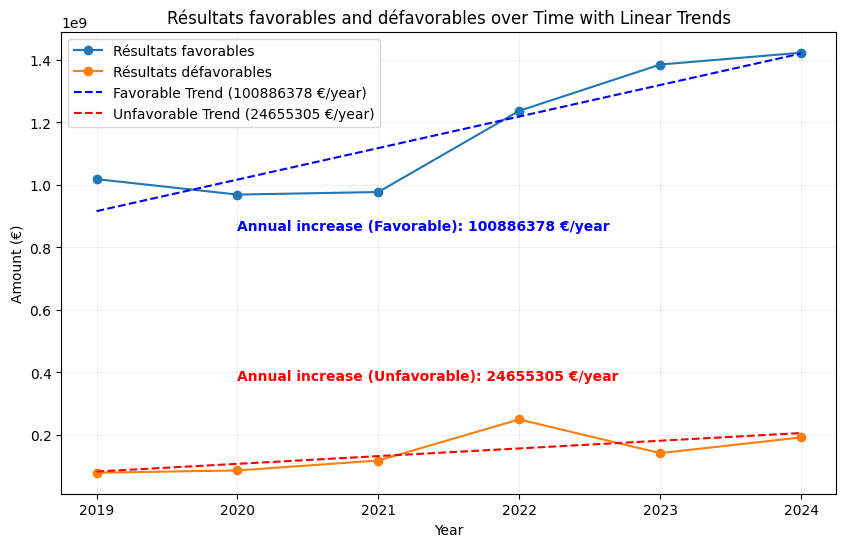

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(evaluation_budget['Année'], evaluation_budget['Résultats favorables'], marker='o', linestyle='-', label='Résultats favorables')
plt.plot(evaluation_budget['Année'], evaluation_budget['Résultats défavorables'], marker='o', linestyle='-', label='Résultats défavorables')

# Add regression lines
plt.plot(evaluation_budget['Année'], intercept_favorable + slope_favorable * evaluation_budget['Année'], color='blue', linestyle='--', label=f'Favorable Trend ({slope_favorable:.0f} €/year)')
plt.plot(evaluation_budget['Année'], intercept_defavorable + slope_defavorable * evaluation_budget['Année'], color='red', linestyle='--', label=f'Unfavorable Trend ({slope_defavorable:.0f} €/year)')

# Add slope annotations directly on the graph
plt.text(2020, evaluation_budget['Résultats favorables'].max() * 0.6, f"Annual increase (Favorable): {slope_favorable:.0f} €/year", color='blue', fontsize=10, weight='bold')
plt.text(2020, evaluation_budget['Résultats défavorables'].max() * 1.5, f"Annual increase (Unfavorable): {slope_defavorable:.0f} €/year", color='red', fontsize=10, weight='bold')


plt.title('Résultats favorables and défavorables over Time with Linear Trends')
plt.xlabel('Year')
plt.ylabel('Amount (€)')
plt.grid(alpha = 0.2)
plt.xticks(evaluation_budget['Année']) # Ensure all years are shown on the x-axis
plt.legend()
plt.show()

*   **Résultats favorables:** The blue line and its corresponding dashed trend line clearly show a strong increasing trend in budget allocated to favorable climate outcomes. The annotation on the graph indicates an annual increase of approximately 100,886,378 €. This demonstrates a consistent and significant growth in investments with positive climate impact.

*   **Résultats défavorables:** The orange line and its dashed trend line also show an increasing trend, but with more year-to-year fluctuation compared to the favorable results. The annotation indicates an annual increase of approximately 24,655,305 €. While these unfavorable results are increasing, their rate of growth is considerably lower than that of the favorable outcomes.

**In summary:** The visual trends and the calculated slopes both highlight a positive shift in budget allocation over the analyzed period. The significantly higher annual increase in 'Résultats favorables' compared to 'Résultats défavorables' suggests that Paris is increasingly prioritizing and investing in initiatives that contribute positively to climate action and urban cooling. This indicates progress towards the city's climate adaptation goals, although the continued increase in unfavorable results suggests ongoing challenges or growing overall expenditure.


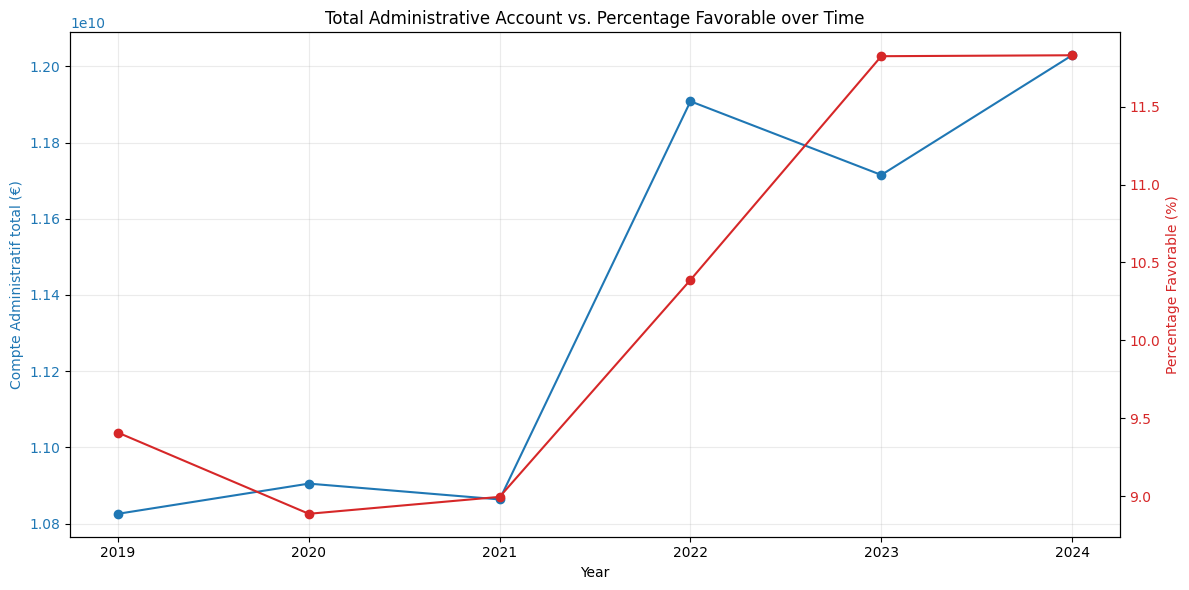

In [111]:
evaluation_budget['Percentage Favorable'] = (evaluation_budget['Résultats favorables'] / evaluation_budget['Compte Administratif total']) * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Administrative Account on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Compte Administratif total (€)', color=color)
ax1.plot(evaluation_budget['Année'], evaluation_budget['Compte Administratif total'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.25)

# Create a second y-axis for Percentage Favorable
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage Favorable (%)', color=color)
ax2.plot(evaluation_budget['Année'], evaluation_budget['Percentage Favorable'], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Administrative Account vs. Percentage Favorable over Time')
plt.xticks(evaluation_budget['Année']) # Ensure all years are shown on the x-axis
fig.tight_layout() # To prevent labels overlapping
plt.show()

Both the total budget and the percentage of that budget allocated to favorable climate results are increasing. It suggests that not only is the overall spending increasing, but the city is also dedicating a growing proportion of its budget towards initiatives that have a positive climate impact. This reinforces the earlier finding that favorable climate investments are increasing at a faster rate than unfavorable ones, and shows that this increase is happening even as the overall budget expands.

In [112]:
display(evaluation_budget.describe())

,Année,Compte Administratif total,Résultats favorables,Résultats défavorables,Percentage Favorable
count,6.000000,6.000000e+00,6.000000e+00,6.000000e+00,6.000000
mean,2021.500000,1.137448e+10,1.168357e+09,1.444334e+08,10.222119
std,1.870829,5.676323e+08,2.075128e+08,6.583191e+07,1.351460
min,2019.000000,1.082600e+10,9.691081e+08,7.902000e+07,8.886692
25%,2020.250000,1.087406e+10,9.875480e+08,9.421352e+07,9.098513
50%,2021.500000,1.131005e+10,1.127764e+09,1.298915e+08,9.897980
75%,2022.750000,1.185985e+10,1.348168e+09,1.794537e+08,11.465281
max,2024.000000,1.202894e+10,1.423062e+09,2.495021e+08,11.830322


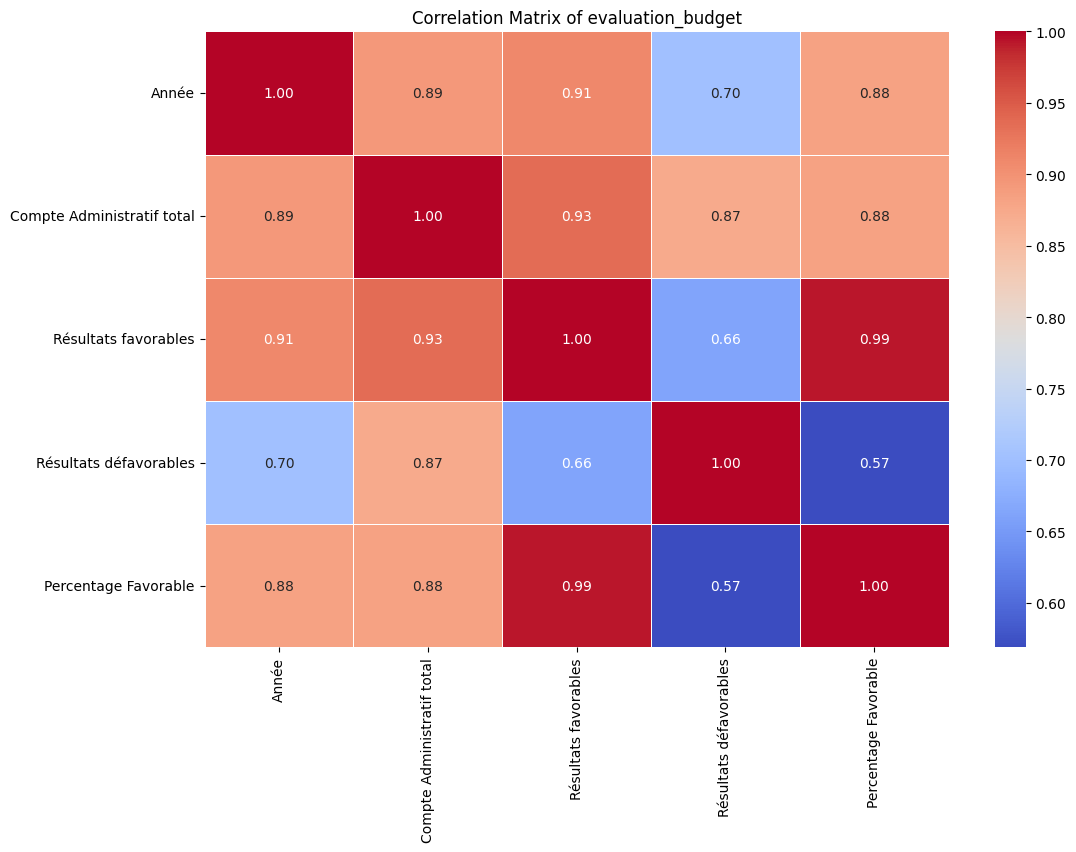

In [113]:
correlation_matrix = evaluation_budget.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of evaluation_budget')
plt.show()

**Strong Notable Correlations :**
*   'Année' and 'Compte Administratif total' (~0.89): The total administrative account also shows a strong positive correlation with the year, indicating an increasing trend in the overall budget.
*   'Année' and 'Résultats favorables (Très + Plutôt favorables)' (~0.91): This shows that favorable climate-related budget outcomes have strongly increased over the years.
*   'Compte Administratif total' and 'Résultats favorables (Très + Plutôt favorables)' (~0.93): As the total budget increases, the favorable climate results also tend to increase significantly.
